# Pandas Lab: Titanic

### Step 1: Reading the data

#### Go to https://www.kaggle.com/c/titanic/data
#### If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
#### Download the train.csv file into this project
#### Create an iPython notebook and load the csv into pandas.

In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# read in the csv file
titanic = pd.read_csv("titanic.csv")

In [3]:
#For reference:

# Data Dictionary
# Variable	Definition	Key
# Survived	Survival	0 = No, 1 = Yes
# Pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# Sex	Sex	
# Age	Age in years	
# SibSp	# of siblings / spouses aboard the Titanic	
# Parch	# of parents / children aboard the Titanic	
# Ticket	Ticket number	
# Fare	Passenger fare	
# Cabin	Cabin number	
# Embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


# Variable Notes
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

### Step 2: Cleaning the data

#### Create a bar chart showing how many missing values are in each column
#### Which column has the most NaN values? How many cells in that column are empty?
#### Delete all rows where Embarked is empty
#### Fill all empty cabins with  shrug emoji
#### Note: NaN, empty, and missing are synonymous.

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


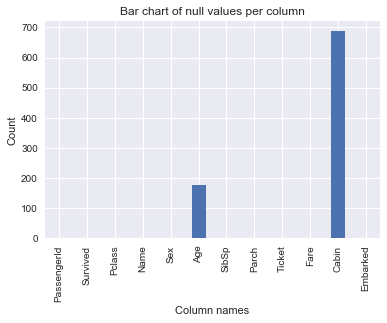

In [6]:
# Bar chart showing how many null values are in each column
null_vals = titanic.isnull().sum()
print(null_vals)

nv_bar = null_vals.plot(kind='bar')
nv_bar.set_title('Bar chart of null values per column')
nv_bar.set_xlabel('Column names')
nv_bar.set_ylabel('Count')

In [7]:
# Conclusion: 'Cabin' has the most null values with 687. 'Age' has the second-most null values with 177. 
# And 'Embarked' has 2 null values. The remaining nine columns have no nulls.

In [8]:
# Delete rows where 'Embarked' is empty

#titanic['Embarked'].unique()         # returns array(['S', 'C', 'Q', nan], dtype=object)
titanic = titanic[~titanic['Embarked'].isnull()]

print(titanic.shape)    #returns (889, 12) -> down from 891

(889, 12)


In [9]:
# Fill all empty cabins with a shrug emoji ¯\(ツ)/¯
titanic['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


### Step 3: Feature extraction

#### There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.
#### Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
#### In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies
#### Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
#### Do the same thing for Sex
#### BONUS: Extract the title from everyone's name and create dummy columns

In [10]:
# Create column FamilyCount (sum of SibSp and Parch)
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


In [11]:
# Create column IsReverend, where 1=preacher, 0=not
def create_IsReverend(row):
    if 'Rev.' in row['Name']:
        return 1
    else:
        return 0

titanic['IsReverend'] = titanic.apply(create_IsReverend, axis=1)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,0


In [12]:
# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S, with 1's and 0's corresponding to the C, Q and S values 
#in'Embarked' using pd.dummies

new_df = pd.get_dummies(titanic[['Embarked']])

new_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
#drop Embarked_S column to make that the baseline
new_df = pd.DataFrame.drop(new_df, 'Embarked_S', axis=1)
new_df.head()

,Embarked_C,Embarked_Q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [14]:
#Append remaining two Embarked dummy columns to existing dataframe
titanic = pd.concat([titanic, new_df], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0


In [15]:
titanic.shape

(889, 16)

In [16]:
# Create dummy columns for sex
new_df2 = pd.get_dummies(titanic[['Sex']])

new_df2.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [17]:
#drop Sex_male column to make that the baseline
new_df2 = pd.DataFrame.drop(new_df2, 'Sex_male', axis=1)
new_df2.head()

,Sex_female
0,0
1,1
2,1
3,1
4,0


In [18]:
#Append remaining two Embarked dummy columns to existing dataframe
titanic = pd.concat([titanic, new_df2], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Sex_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,0


In [19]:
titanic.shape

(889, 17)

### Step 4: Exploratory analysis

#### What was the survival rate overall?
#### Which gender fared the worst? What was their survival rate?
#### What was the survival rate for each Pclass?
#### Did any reverends survive? How many?
#### What is the survival rate for cabins marked with the shrug emoji?
#### What is the survival rate for people whose Age is empty?
#### What is the survival rate for each port of embarkation?
#### What is the survival rate for children (under 12) in each Pclass?
#### Did the captain of the ship survive? Is he on the list?
#### Of all the people that died, who had the most expensive ticket? How much did it cost?
#### Does having family on the boat help or hurt your chances of survival?

In [20]:
titanic['Survived'].value_counts()     # returns 549 0's (perished) and 340 1's (survived) 

0    549
1    340
Name: Survived, dtype: int64

In [21]:
# Overall survival rate
survived = titanic["Survived"] == 1   # survived.value_counts() returns 549 False (perished) and 340 True (survived)

survival_rate = len(titanic[survived]) / len(titanic['Survived'])
print('Overall survival rate: {:.2%}'.format(survival_rate))

Overall survival rate: 38.25%


In [22]:
# Which gender fared the worst, and their survival rate
titanic['Sex'].value_counts()  # returns 577 males and 312 females -> total 889

males = titanic['Sex'] == 'male'  # males.value_counts() returns 577 males
females = titanic['Sex'] == 'female'  # females.value_counts() returns 312 females

male_survivors = len(titanic[males][survived]) / len(titanic[males]['Survived'])
female_survivors = len(titanic[females][survived]) / len(titanic[females]['Survived'])
print('Male survivors: {:.2%}'.format(male_survivors))
print('Female survivors: {:.2%}'.format(female_survivors))

# Conclusion: Males fared much worse with a survival rate of about 19%, compared with 74% of females.

Male survivors: 18.89%
Female survivors: 74.04%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [23]:
# Survival rate for each Pclass
titanic['Pclass'].value_counts()   # returns 214 class 1, 184 class 2, and 491 class 3

first_class = titanic['Pclass'] == 1  # first_class.value_counts() returns 214 class 1  
second_class = titanic['Pclass'] == 2  # second_class.value_counts() returns 184 class 2
third_class = titanic['Pclass'] == 3  # third_class.value_counts() returns 491 class 3

first_class_survivors = len(titanic[first_class][survived]) / len(titanic[first_class]['Survived'])
second_class_survivors = len(titanic[second_class][survived]) / len(titanic[second_class]['Survived'])
third_class_survivors = len(titanic[third_class][survived]) / len(titanic[third_class]['Survived'])

print('1st class survivors: {:.2%}'.format(first_class_survivors))
print('2nd class survivors: {:.2%}'.format(second_class_survivors))
print('3rd class survivors: {:.2%}'.format(third_class_survivors))

1st class survivors: 62.62%
2nd class survivors: 47.28%
3rd class survivors: 24.24%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [24]:
# Did any reverends survive, and how many
titanic['IsReverend'].value_counts()   # returns 6 reverends

reverend = titanic['IsReverend'] == 1

reverend_survivors = len(titanic[reverend][survived]) / len(titanic[reverend]['Survived'])
print('Reverend survivors: {:.2%}'.format(reverend_survivors))

Reverend survivors: 0.00%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [25]:
# Survival rate for cabins with shrug emoji
titanic['Cabin'].value_counts()  #returns 687 with ¯\(ツ)/¯

cabin_shrug = titanic['Cabin'] == '¯\(ツ)/¯'

cabin_shrug_survivors = len(titanic[cabin_shrug][survived]) / len(titanic[cabin_shrug]['Survived'])
print('Survivors from cabin ¯\(ツ)/¯: {:.2%}'.format(cabin_shrug_survivors))

Survivors from cabin ¯\(ツ)/¯: 29.99%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [26]:
# Survival rate for people with empty Age
titanic['Age'].isnull().value_counts()  # returns 177 with null value for Age

age_null = titanic['Age'].isnull()

age_null_survivors = len(titanic[age_null][survived]) / len(titanic[age_null]['Survived'])
print('Survivors with empty Age: {:.2%}'.format(age_null_survivors))

Survivors with empty Age: 29.38%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [27]:
# Survival rate by port of embarkation
titanic['Embarked'].value_counts()    #returns 644 from Southampton, 168 from Cherbourg, and 77 from Queenstown

Southampton = titanic['Embarked'] == 'S'
Cherbourg = titanic['Embarked'] == 'C'
Queenstown = titanic['Embarked'] == 'Q'

Southampton_survivors = len(titanic[Southampton][survived]) / len(titanic[Southampton]['Survived'])
Cherbourg_survivors = len(titanic[Cherbourg][survived]) / len(titanic[Cherbourg]['Survived'])
Queenstown_survivors = len(titanic[Queenstown][survived]) / len(titanic[Queenstown]['Survived'])

print('Survivors from Southampton: {:.2%}'.format(Southampton_survivors))
print('Survivors from Cherbourg: {:.2%}'.format(Cherbourg_survivors))
print('Survivors from Queenstown: {:.2%}'.format(Queenstown_survivors))

Survivors from Southampton: 33.70%
Survivors from Cherbourg: 55.36%
Survivors from Queenstown: 38.96%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [28]:
# Survival rate for children under 12 in each Pclass
under_12 = titanic['Age'] < 12

under_12_1stclass_survivors = len(titanic[under_12][first_class][survived]) / len(titanic[under_12][first_class]['Survived'])
under_12_2ndclass_survivors = len(titanic[under_12][second_class][survived]) / len(titanic[under_12][second_class]['Survived'])
under_12_3rdclass_survivors = len(titanic[under_12][third_class][survived]) / len(titanic[under_12][third_class]['Survived'])

print('Survivors under age 12 from first class: {:.2%}'.format(under_12_1stclass_survivors))
print('Survivors under age 12 from second class: {:.2%}'.format(under_12_2ndclass_survivors))
print('Survivors under age 12 from third class: {:.2%}'.format(under_12_3rdclass_survivors))

Survivors under age 12 from first class: 75.00%
Survivors under age 12 from second class: 100.00%
Survivors under age 12 from third class: 40.43%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [29]:
# Does the captain survive - is he on the list?
captain = titanic.loc[titanic['Name'].str.contains('Capt')]
captain

#Conclusion: Capt. Crosby is on the list, but he did not survive.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Sex_female
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,0


In [41]:
titanic[~survived]['Fare'].max()

263.0

In [43]:
# Of the people who died, who had the most expensive ticket; what was the cost
highest_fare_nonsurvivor = titanic.loc[titanic[~survived]['Fare'].max()]    # $263.0000
highest_fare_nonsurvivor

mask = titanic['Fare'] == 263
titanic[mask]

# Conclusion: Mr. Charles Alexander Fortune and Mr. Mark Fortune both died, and their ticket price was $263

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Sex_female,age_18+
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,0,0,0,1


In [31]:
# Does having family on the boat help or hurt survival chances
family_onboard = titanic['FamilyCount'] >= 1   # family_onboard.value_counts() returns 354 with, 535 without
no_family_onboard = titanic['FamilyCount'] == 0

family_onboard_survivors = len(titanic[family_onboard][survived]) / len(titanic[family_onboard]['Survived'])
no_family_onboard_survivors = len(titanic[no_family_onboard][survived]) / len(titanic[no_family_onboard]['Survived'])

print('Survivors with family onboard: {:.2%}'.format(family_onboard_survivors))
print('Survivors without family onboard: {:.02%}'.format(no_family_onboard_survivors))

# Conclusion: passengers with family on the boat survived at a higher rate

/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Survivors with family onboard: 50.56%
Survivors without family onboard: 30.09%


/Users/mariayarolin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Step 5: Plotting

#### Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. 
#### It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

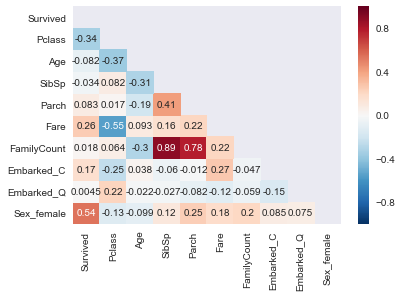

In [34]:
# correlation heat map
corr_titanic = titanic[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare', \
                        'Cabin', 'FamilyCount', 'Embarked_C', 'Embarked_Q', 'Sex_female']].corr()
corr_titanic

mask = np.zeros_like(corr_titanic, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_titanic, annot=True, mask=mask)

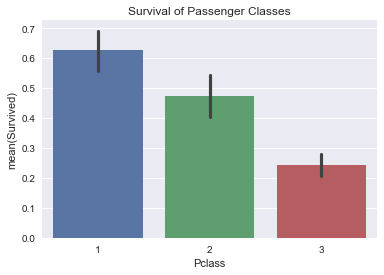

In [35]:
# Survival of Passenger Class by Sex
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival of Passenger Classes')

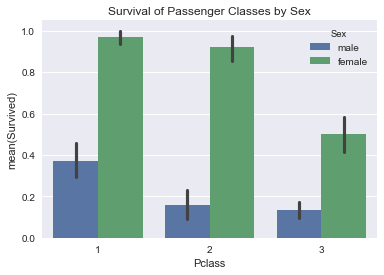

In [36]:
# Survival of Passenger Class by Sex
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.title('Survival of Passenger Classes by Sex')

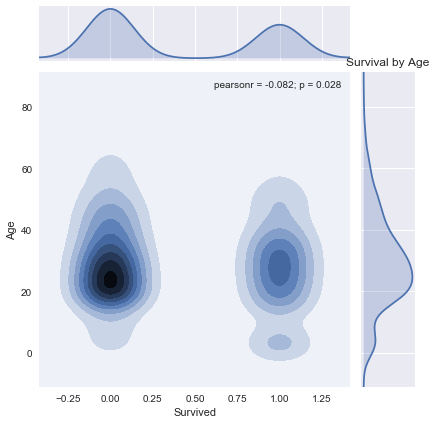

In [37]:
sns.jointplot(x='Survived', y='Age', data=titanic, kind='kde')
plt.title("Survival by Age")

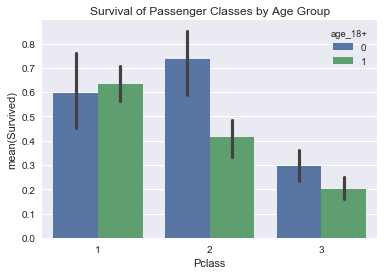

In [38]:
titanic['age_18+'] = titanic['Age'].apply(lambda x: 1 if x >= 18 else 0)

sns.barplot(x='Pclass', y='Survived', hue='age_18+', data=titanic)
plt.title('Survival of Passenger Classes by Age Group')

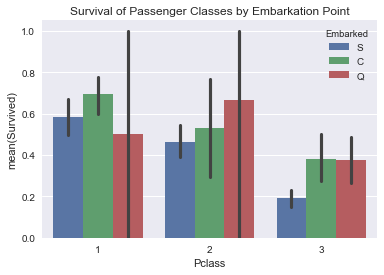

In [39]:
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=titanic)
plt.title('Survival of Passenger Classes by Embarkation Point')

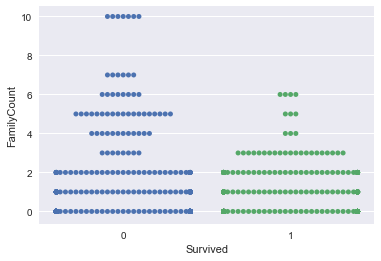

In [40]:
sns.swarmplot(x="Survived", y="FamilyCount", data=titanic);